# Analyse de l'article : False discoveries occur early on the Lasso path

## Partie 1 : Présentation du contexte et de principaux résultats

### 1. Contexte

On se place dans le cadre d'une régression classique :

$Y = X\beta + \epsilon$ avec :
- $X \in \mathbb{R}^{n \times p}$ la matrice de design;
- $\beta \in \mathbb{R}^p$ le vecteur des coefficients;
- $\epsilon \in \mathbb{R}^n$ l'erreur résiduelle.

#### A) Optimalité théorique

On suppose que : 

$
\epsilon_i \overset{iid}{\sim} \mathcal{N}(0,\sigma^2), \beta \in \{\beta_0[k] = \{\beta \in \mathbb{R}^p : |\beta|_0 \leq k \}
$ (au plus k-sparse).

On définit un estimateur de $\beta$ tel que : $\hat{\beta} \in arg\min_{\beta \in \beta_0[k]} || Y - X\beta ||^2$

Mesure de qualité (risque) : 
$$
R(\hat{\beta}, \beta) = \mathbb{E}[|| X\hat{\beta} - X \beta ||^2]
$$

Meilleut estimateur de $\beta$ :
$$
\inf_{\hat{\beta}} R(\hat{\beta}, \beta) = 0
$$

Problème : estimateur dégénéré (on ne connaît pas $\beta$)

Risque minimax : donne une garantie/un contrôle dans le pire des cas
$$
\inf_{\hat{\beta}} \sup_{\beta \in \beta_0[k]} R(\hat{\beta}, \beta) = 0
$$

Risque bayésien :
$$
\inf_{\hat{\beta}} \int_{\beta \in \beta_0[k]} R(\hat{\beta}, \beta) d\mu(\beta)
$$

<u>Remarque :</u> Ce dernier dépend de la mesure $\mu$ choisie

Si k est inconnu, on a :
$$
\hat{\beta} \in arg\min_{\beta \in \mathbb{R}^p} || Y - X\beta ||^2 + \overbrace{2\mu \sigma^2 |\beta|_0 (1 + \log \frac{p}{|\beta|_0})}^{terme \, de \, pénalisation \, des \, \beta \, qui \, ont \, beaucoup \, de \, coefficients \, non \, nuls}
$$

Dans ce cas, on obtient :
$\sup_{\beta \in \beta_0[k]} R(\hat{\beta}, \beta) \leq c \sigma^2 k (1 + log \frac{p}{k})$ pour $k \leq \frac{n}{\log(p)}$

<u>Remarque :</u> Impossible à calculer en temps fini (sauf cas particuliers)

<u>Exemple :</u> $X^T X = I_p$

$
\begin{align}
|| Y - X\beta ||^2 &= || Y - proj_{Im(X)}Y + \overbrace{proj_{Im(X)}Y}^{=X(X^T X)^{-1}X^T} - X\beta ||^2 \\
                   &= || Y - proj_{Im(X)}Y ||^2 + ||X(\overbrace{X^T Y}^{z} - \beta) ||^2
\end{align}
$

$
||X(z - \beta)||^2 = (z - \beta)^T \overbrace{X^T X}^{I_p} (z - \beta) = ||(z - \beta)||^2
$



$
\hat{\beta} \in arg\min_{\underbrace{\beta}_{=\bigcup_{k \geq 0} \beta_0[k]} \in \mathbb{R}^p} [ \sum_j (\beta_j - z_j)^2 + |\beta|_0 \times \overbrace{2\mu \sigma^2 (1 + \log \frac{p}{|\beta|_0}}^{\lambda})]
$
 
$\min_{\beta \in \beta_0[k]} \sum_{j=1}^p (\beta_j - z_j)^2 = \sum_{j=1}^p z_j^2 - \sum_{j=1}^k z_{(j)}^2$ atteint par $\hat{\beta}$ avec $\hat{\beta}_j = z_j$ si $z_j^2$ est une des k plus grandes valeurs

On obtient :
$
\min_k {||z||^2 - \sum_{j=1}^k [ z_{(j)}^2 } - \lambda]
$

On prend donc $\hat{k} = \max_k{z_{(k)}^2 \geq \lambda} \Longrightarrow \hat{\beta}_j = z_j \mathbb{1}_{|z_j| \geq \sqrt{\lambda}}$




#### B) Lasso (pénalisation $L^1$)

Le Lasso correspond tout simplement à la solution d'un problème d'optimisation linéaire où le terme de pénalisation est de norme 1.

Relaxation convexe : $|\beta_0| \longrightarrow |\beta_1|$

$\hat{\beta} \in arg\min_{\beta \in \mathbb{R}^p} || Y - X\beta ||^2 + \lambda|\beta|_1$ (Lasso)

Si $X^T X = I_p$, on a $\hat{\beta}_j = [X_j^T Y - \frac{\lambda}{2} sgn(X_j^T Y)] \mathbb{1}_{|X_j^T Y| \geq \lambda / 2} = X_j^T Y (1 - \frac{\lambda}{2|X_j^T Y|})_+$

<u>Remarque :</u> La question est maintenant de savoir si cet estimateur est aussi bon que le précédent.
Pour $\beta \in \ \beta_0[k]$, $R(\hat{\beta}, \beta) \leq \underbrace{C(X, \beta)}_{tend \, à \, diverger \, si \, les \, X_j \, sont \, très \, corrélés} \times \sigma^2 k (1 + log \frac{p}{k})$`

C'est en quelque sorte le prix à payer pour avoir un temps de calcul raisonable.

<u>Exemple :</u> $X_{ij} \sim \mathcal{N}(0, 1/n)$

$||X_j||^2 = \sum_{i = 1}^n X_{ij}^2 \approx \frac{n}{n} + o(1/\sqrt{n})$ (TCL)

$ <X_j, X_k>_{j \ne k} = \sum_{i = 1}^n X_{ij} X_{ik} = o(1/\sqrt{n})$

Dans ce cas, on peut montrer que $C(X, \beta) \leq cst$ tant que $|\beta|_0 \leq \frac{n}{log(p)}$ (pas trop de variables non nulles)

Ainsi, le Lasso a cette particularité de naturellement sélectionner des variables, notamment en grande dimension ($p \geq n$).

On compare ensuite $f_{\beta}(z) = \sum_j \beta_j \phi_j(z)$ avec $f_{\hat{\beta}}(z) = \sum_j \hat{\beta}_j \phi_j(z)$

#### C) Feature selection

La question posée est alors la suivante : a-t-on une bonne sélection des coefficients non nuls j ?

Dans le cas $X_{ij} \sim \mathcal{N}(0, 1/n)$

Si $|\beta|_0 \leq \frac{n}{log(p)}$ alors $supp(\hat{\beta}) \approx supp(\beta)$ avec grande probabilité si $|\beta_j| \geq \sigma \sqrt{log(p)}, \beta_j \ne 0$

$\hat{\beta}_j = X_j^T Y \overbrace{(1 - \frac{\lambda}{2|X_j^T Y|})_+}^{biais}$

Le lasso tend à sélectionner trop de variables car il choisit un $\lambda$ trop petit afin de résuire le biais. 

<u>Remarque :</u> Le choix de $\lambda$ peut se faire par Cross-Validation (CV)

<u>Répéter :</u>
- Choix de n/2 observations au hasard
- Faire tourner le Lasso

<u>Choisir :</u> Les variables j sélectionnées dans au moins 80% des cas.





#### D) Motivation de l'article

Le Lasso est donc communément utilisé lorque la solution est sparse (beaucoup de features ne sont pas prédictives). On sait que le Lasso est efficace dans un régime asymptotique. Cependant, dans un régime non asymptotique, sa robustesse n'est pas démontrée. Au contraire, en pratique, le Lasso ne sélectionne pas vraiment les bonnes variables.

Ce problème du Lasso est générallement attribué au fait qu'il faille atteindre une taille d'effet, notamment du fait de la corrélation entre les variables prédictives.

L'article cherche alors à étudier le Lasso lorsqu'il y a peu voire pas du tout de bruit ni de corrélation pour se rendre compte que le problème est toujours présent et l'explique par un problème de coefficient dû à la norme $L^1$ qui n'existe pas lorsque l'on utilise la norme $L^0$.

### 2. Principaux résultats

####Lasso Trade-off

C'est le principal résultat de l'article. Il montre qu'il est impossible d'avoir un taux important de bonne sélection de variable combiné à un taux faible de mauvaises sélections. Commençons par définir ces deux termes.

<u>Définition :</u> True Positive Proportion (TPP) et False Discovery Proportion (FDP)

$FDP(\lambda) = \frac{V(\lambda)}{max(|\{j : \hat{\beta}_j(\lambda) \ne 0\}|, 1)}$ avec $V(\lambda) = \{j : \hat{\beta}_j(\lambda) \ne 0 \,and\, \beta_j(\lambda) = 0 \}$ (False Discovery Proportion)

$TPP(\lambda) = \frac{T(\lambda)}{max(k, 1)}$ avec $T(\lambda) = \{j : \hat{\beta}_j(\lambda) \ne 0 \,and\, \beta_j(\lambda) \ne 0 \}$ (True Positive Proportion)

We denote $S = \{j : \beta_j \ne 0\}, k = |S| \approx p\epsilon = \epsilon / \delta n$ with $\delta \in (0, \infty), \epsilon \in (0, 1)$

<u>Théorème 1 :</u> Lasso Trade-off

We consider the function $q_{\epsilon, \lambda}(u) = \frac{2 (1-\epsilon) \Phi(-t^*(u))}{2 (1-\epsilon) \Phi(-t^*(u)) + \epsilon u} $

$\forall \sigma \geq, \forall \lambda \geq \lambda_0, FDP(\lambda) \geq  q_{\epsilon, \lambda}(TPP(\lambda)) - \eta$ for any arbitrary small constants $\lambda_0 > 0$ and $\eta > 0$



####Performance de la norme $l_0$

Le deuxième grand résultat de l'article a pour objectif d'expliquer pourquoi le Lasso souffre de ces limitations. Pour cela, il compare l'estimation Lasso avec un estimateur de maximum de vraissemblance appliqué avec une norme $l_0$ :
$\hat{\beta}_0 = arg \min_{b \in \mathbb{R}^p} || y - Xb ||^2 + \lambda ||b||_0$

<u>Théorème 2 :</u> $l_0$ performance
On prend $\epsilon < \delta$ et on considère le point prior suivant :

$\Pi = \left \{
   \begin{array}{r c l}
      M \, avec \, probabilité \, \epsilon \\
      0 \, avec \, probabilité \, 1 - \epsilon \\
   \end{array}
   \right .$

Dans ce cas, on a : $\left \{
   \begin{array}{r c l}
      \lim_{M \to \infty} lim_{n, p \to \infty} FDP = 0 \\
      \lim_{M \to \infty} lim_{n, p \to \infty} TPP = 1 \\
   \end{array}
   \right .$

Ce théorème montre qu'avec la norme $l_0$, on peut avoir 100% de bonne sélection et 0% de mauvaise sélection en même. 

Le problème du Lasso viendrait donc du terme de régularisation. Lorsque $\lambda$ est grand, les estimations du Lasso (coefficients $\beta$) sont tirés vers le bas, ce qui a pour effet d'ajouter du bruit (appelé "shrinkage noise"). Ainsi, plus le Lasso va des variables (augmenter leur coefficient associé), plus ce bruit va également augmenter et se propager également dans la direction des variables nulles, ce qui aura pour conséquence que le Lasso va faire plus d'erreur en les sélectionnant.

## Partie 2 : Analyse critique du papier

### 1. Portée des résultats et limitations

Ces résultats sont obtenus dans un cadre bien précis.

#### Portée : Régression avec des variables Gaussiennes

Les résultats présentés peuvent êêtre jugés comme plutôôt négatifs. 
Or, les auteurs se sont placés dans un cadre classique où les variables prédictives $X_1, ..., X_n \overset{iid}{\sim} \mathcal{N}(0, 1)$
Ce cadre est censé être facilitant pour la sélection de variable puisque les variables ne sont pas corrélées. Ainsi, ces résultats devraient pouvoir se généraliser dans des cas cadres moins favorables.

<u>Remarque :</u> Il n'y a pas de contrainte sur la distribution des coefficients $\beta_1, ..., \beta_p$ qi ce n'est qu'ils doivent avoir un moment d'ordre 2 borné ($\mathbb{E}[\beta^2] < \infty$) et une distribution empirique qui converge.


#### Limitation : Sparsité linéaire

Tout d'abord, on suppose que l'on ait dans un régime de sparsité linéaire, c'est-à-dire que l'on suppose le nombre de coefficients non nuls est égal à $\epsilon p$ avec $\epsilon > 0$ et $p$ le nombre de features.

Cela exclut de fait des des régimes plus courants dans lesquels le nombre de coeffcient non nuls tend vers 0 lorque la taille du problème tend vers l'infini.
Ainsi, on peut peux pas généraliser ces résultats à ce type de cas.
Cependant, le régime de sparsité linéaire est également intéressant car il décrit des données qui sont certes en grande dimension mais pas forcément infinie avec un degré de sparsité assez important.

### 2. Message à retenir

Le message à retenir de cet article peut tenir sur une seule ligne :
Si $|\beta|_0$ est proportinel à $p$, ça se passe mal.

Si on doit résumer en plus d'une ligne, en grande dimension, l'augmentation de l'espace de représentation des données pose des problèmes de comparaison car celles-ci ont tendance à s'écarter, ce qui rend plus difficile les tâches de régression/classification : c'est ce qu'on appelle "the curse of high dimensionality" (le fléau de la grande dimension). 

Le LASSO (Least Absolute Shrinkage and Selection Operator) a pour but de solutioner ce problème en ajoutant un régularisation en norme L1, qui, contrairement au Ridge (régularisation en norme L2), va annuler des coefficients et ainsi sélectionner de variables.

C'est très bien mais encore faut-il que le modèle sélectionne les bonnes variables (celles qui sont explicatives). Cela a été prouvé dans le cas où le nombre de d'individus n est inférieur au nombre de variables p par example. Certaines limites du Lasso ont également été mises en lumière, notamment dans le cas où les variables sont corrélées, la consistence de la sélection n'est pas assurée.

La contribution de cet article se situe dans le cas où le nombre de coefficients non nuls $|\beta|_0 = K$ est proportionnel au nombre de variables p. Dans ce cas, il montre que la performance du Lasso est limités puisque plus le nombre de variables explicatives sélectionnées sera important, plus le nombre de variables non explicatives sélectionnées le sera également.

## Partie 3 : Exploration personnelle (numérique)

### Problématique et plan d'expérience

Dans cette partie, nous allons essayer de sortir du cadre précis dans lequel se sont placés les auteurs pour voir comment évoluent les résultats qu'ils ont obtenus. 

On peut distinguer plusieurs points qui définissent ce cadre :

- Les variables explicatives sont gaussiennes et indépendantes ;

- L'article se place dans un régime de sparsité linéaire ;

Une expérience intéressante pourrait consister à étudier les résultats de l'article avec des variables explicatives corrélées :

-  Les résultats de l'auteur sont-ils toujours valables lorsque la matrice de design est composé d'éléments qui sont corrélés ?

- Comment évolue trade-off lorsque l'on fait varier la corrélation ?

Pour répondre à cette problématique, on va suivre le plan d'expérience suivant:

- Tout d'abord, on va cherche à reproduire les résultats qui sont présentés dans l'article pour avoir une base solide de comparaison ; 

- Ensuite, on va ajouter une corrélation standard pour voir coment le Lasso réagit ;

- Enfin, on va faire varier cette corrélation pour analyser l'évoultion du trade-off lorsque l'on augmente la corrélation des variables explicatives.


### Réalisation des expériences

#### Résultats de l'article

In [370]:
import numpy as np
from sklearn import linear_model
from scipy.stats import norm
from scipy.optimize import fminbound
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from fdrlasso_article import fdrlasso

##### LASSO PATH

In [371]:
from generator import generate_gaussian, generate_true_y, True_False, simulation_lasso_path

In [372]:
# let's generate data and compute the Lasso path

n = 1000
p = 1050
nb_no_zero = 200
value_no_zero = 4
sigma = 0.1

X = generate_gaussian(n, p) # function generate a gaussian distribution 
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=False) #function generate true target data
_, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)#lasso path
print(beta_hat.shape)

(1050, 1000)


La figure ci-dessous présente la proportion de vrais positifs (TPP) et de faux positifs obtenus par la sélection du Lasso dans le cas suivant :

$X \in \mathbb{R}^{n \times p} \overset{iid}{\sim} \mathcal{N}(0, 1)$

$n = 1010 > 1000 = p$

$\beta_1 = ... = \beta_{200} = 4$, $\beta_{201} = ... = \beta_{1000} = 0$ (sparse setting)


TPP au premier faux positif :  0.085
FDP lorsque TPP = 50% :  0.06542056074766354
FDP lorsque TPP = 100% :  0.1452991452991453


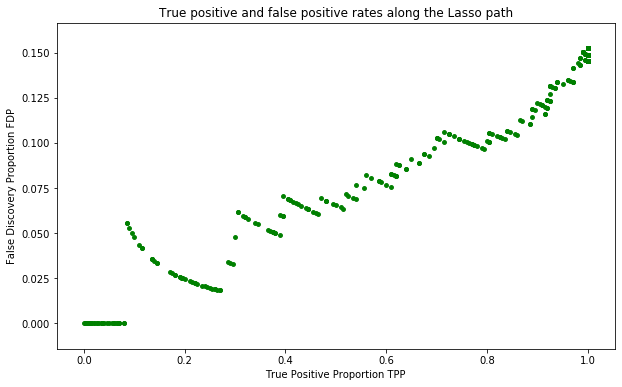

In [374]:
TTP,FDP = True_False(beta_hat,beta)

fig = plt.figure(figsize=(10, 6)) 
plt.scatter(TTP, FDP, s=15, color="green")
plt.xlabel("True Positive Proportion TPP")
plt.ylabel("False Discovery Proportion FDP")
plt.title("True positive and false positive rates along the Lasso path")
plt.show()

In [375]:
tpp_simules, fdp_simules = simulation_lasso_path( nb_simulations=100)

On peut voir que plus on augmente la proportion de vrais positifs (en faisant varier le paramètre de régularisation), plus la proportion de faux positifs augmente mécaniquement. 

La première première intervient très tôt, lorsque le taux de vrai positif n'étant encore que de 32,5% à ce moment-là.

Pour atteindre 50% de vrai positif, le Lasso a concédé 6,5% de faux positifs

Enfin, lorsque l'on atteint 100% de vrais positifs (tous les coefficients non nuls ont été trouvés), le taux de faux positifs s'élève à près de 14%.

Remarque : Si on regénère le lasso path, ces résultats risquent de varier mais selon l'article, le Lasso fait toujours une erreur au moins avant d'atteindre un taux TPP de 44%. Pour avoir des chiffres plus robuste, on va simuler le Lasso path plusieurs fois.

Text(0, 0.5, 'Frequency')

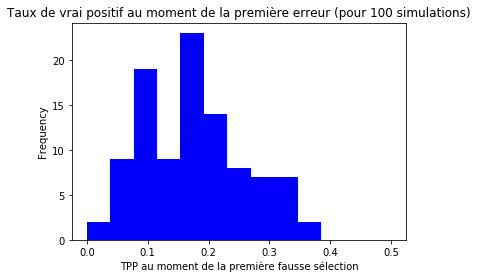

In [378]:
#Display histograms
plt.hist(tpp_simules, bins=13, range=[0, 0.5],  color='blue')
plt.xlabel('TPP au moment de la première fausse sélection')
plt.title("Taux de vrai positif au moment de la première erreur (pour 100 simulations)")
plt.ylabel('Frequency')


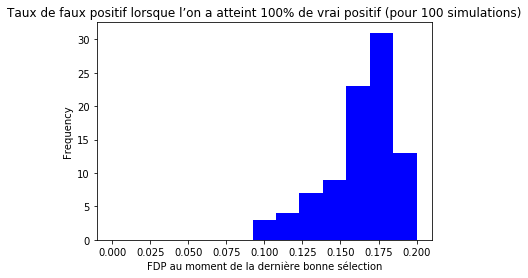

In [379]:
plt.hist(fdp_simules, bins=13, range=[0, 0.2], color='blue')
plt.xlabel('FDP au moment de la dernière bonne sélection')
plt.ylabel('Frequency')
plt.title("Taux de faux positif lorsque l’on a atteint 100% de vrai positif (pour 100 simulations)")
plt.show()

### Comparaison entre lasso et enet path

In [381]:
# let's generate data and compute the Lasso path

n = 1000
d = 1010
nb_no_zero = 500
value_no_zero = 1
sigma = 0.9

In [382]:
X = generate_gaussian(n, d)
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=False)
alpha_enet, beta_hat, __ = linear_model.enet_path(X, y, n_alphas=1000)
print(beta_hat.shape )

(1010, 1000)


In [383]:
TTP_enet,FDP_enet=True_False(beta_hat,beta)

TPP au premier faux positif :  0.032
FDP lorsque TPP = 50% :  0.17647058823529413
FDP lorsque TPP = 100% :  0.3857493857493858


In [384]:
X = generate_gaussian(n, d)
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=False)
alpha_las, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)
print(beta_hat.shape )

(1010, 1000)


In [385]:
print(alpha_las.shape )

(1000,)


In [386]:
TTP_lasso,FDP_lasso=True_False(beta_hat,beta)

TPP au premier faux positif :  0.034
FDP lorsque TPP = 50% :  0.140893470790378
FDP lorsque TPP = 100% :  0.2753623188405797


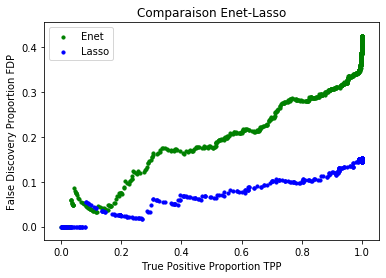

In [391]:
plt.scatter(TTP_enet, FDP_enet, s=10, color="green", label="Enet")
plt.scatter(TTP, FDP, s=10, color="blue",label="Lasso")
plt.xlabel("True Positive Proportion TPP")
plt.ylabel("False Discovery Proportion FDP")
plt.title("Comparaison Enet-Lasso")
plt.legend()
plt.show()

### Lasso Trade-off Diagram de l'article

In [394]:
# let's generate data and compute the Lasso path

n = 1000
p = 1050
nb_no_zero = 200
value_no_zero = 4
sigma = 0.1

X = generate_gaussian(n, p)
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=False)
_, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)
print(beta_hat.shape)

(1050, 1000)


In [393]:
def boud(TTP,delta,epsi):
  bound=[]
  for i in TTP:
    bound.append(fdrlasso(tpp=i, delta=delta, epsi=epsi))
  
  return bound


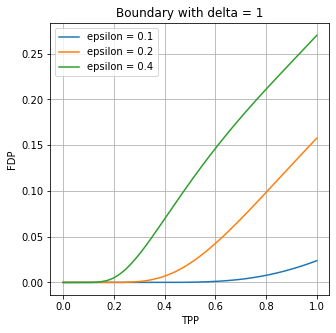

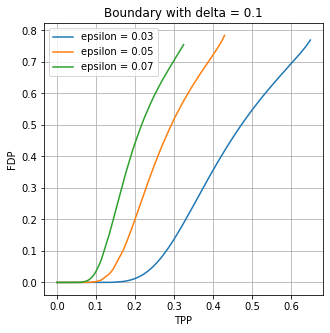

In [395]:
epsilon1=[0.1,0.2,0.4]
epsilon2=[0.03,0.05,0.07]
deltas=[1,0.1]
for delta in deltas :
  plt.figure(figsize=(5,5))
  plt.title("Boundary with delta = "+ str(delta))
  if delta==1:
    for e in epsilon1:
      bound= boud(TTP,delta=delta, epsi=e)
      plt.grid()  
      plt.xlabel("TPP")
      plt.ylabel("FDP")

      plt.plot(TTP,bound, label="epsilon = "+ str(e))
      plt.legend()
  else :
    for e in epsilon2:
      bound= boud(TTP,delta=delta, epsi=e)
      plt.grid()  
      plt.xlabel("TPP")
      plt.ylabel("FDP")
      plt.plot(TTP,bound, label="epsilon = "+ str(e))
      plt.legend()


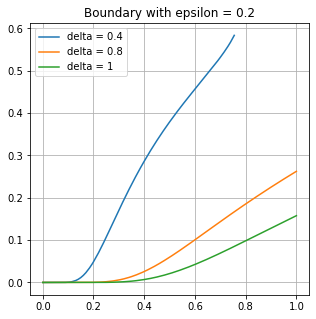

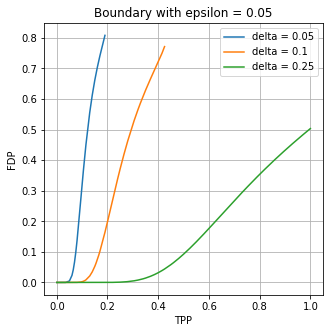

In [0]:
 epsilon=[0.2,0.05]
deltas1=[0.4,0.8,1]
deltas2=[0.05,0.1,0.25]
for e in epsilon :
  if (e==0.2):
    plt.figure(figsize=(5,5))
    plt.title("Boundary with epsilon = " + str(e))
    for d in deltas1:
      bound=  boud(TTP,delta=d, epsi=e)
      plt.grid()
      plt.plot(TTP,bound, label="delta = " + str(d))
      plt.legend()
  else:
    plt.figure(figsize=(5,5))
    plt.title("Boundary with epsilon = " + str(e))
    for d in deltas2:
      bound=  boud(TTP,delta=d, epsi=e)
      plt.grid()
      plt.xlabel("TPP")
      plt.ylabel("FDP")
      plt.plot(TTP,bound, label="delta = " + str(d))
      plt.legend()


In [57]:
#calcul fonction q qui décrit la borne inférieure du taux de fauxpositif.
def trade_of_fill(epsilon,delta,TTP,x,y):
    e=epsilon
    delta=delta
    
    bound=boud(TTP,delta=delta, epsi=e)
    indice=[]
    indic=[]

    if(None in bound):
      for ind,i in enumerate(bound):
        if(i== None):
          indice.append(ind)
          indic.append(TTP[ind])
      plt.axvline(TTP[indice[0]], color="white")

    for i in indice:
      bound[i]=1

    plt.fill_between(TTP, bound, facecolor='#BF3842')
    plt.title("The Lasso trade-off diagram")
    plt.xlabel("TPP")
    plt.ylabel("FDP")
    plt.text(x,y, 'Unachievable')
    plt.show()

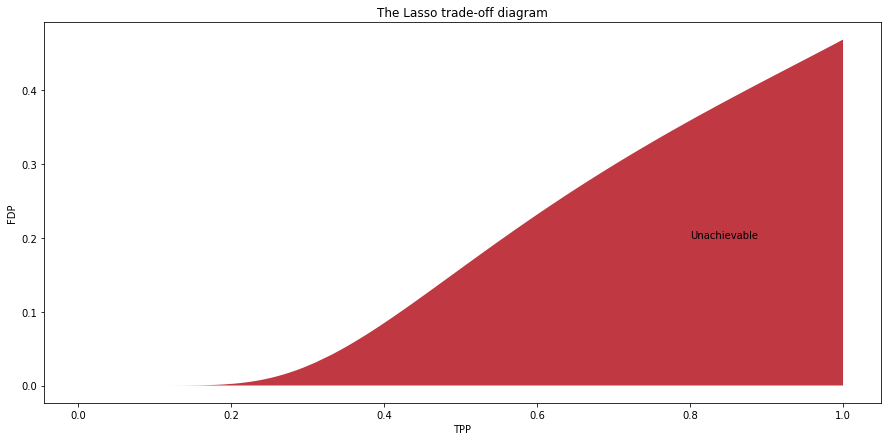

In [42]:
plt.figure(figsize=(15,7))
trade_of_fill(epsilon=0.15,delta=0.5,TTP=TTP,x=0.8,y=0.2)

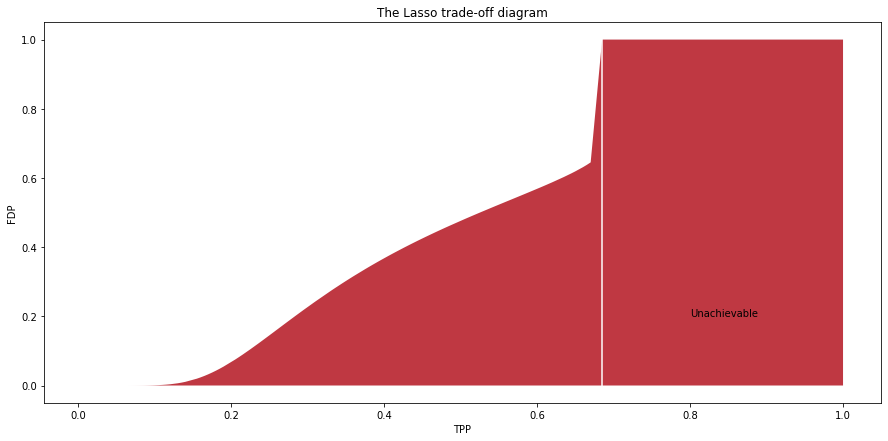

In [43]:
trade_of_fill(epsilon=0.15,delta=0.3,TTP=TTP,x=0.8,y=0.2)

### Limite du Lasso

In [60]:
# let's generate data and compute the Lasso path

n = 1000
p = 300
nb_no_zero = 200
value_no_zero = 4
sigma = 0.1

X = generate_gaussian(n, p)
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=False)
_, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)
print(beta_hat.shape)

(300, 1000)


TPP au premier faux positif :  0.34
FDP lorsque TPP = 50% :  0.009900990099009901
FDP lorsque TPP = 100% :  0.0196078431372549


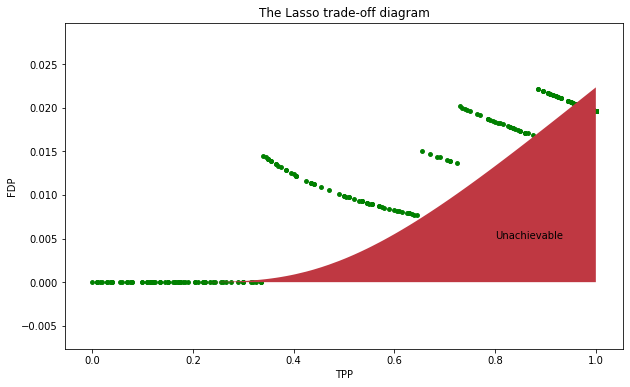

In [0]:
TTP,FDP = True_False(beta_hat,beta)
fig = plt.figure(figsize=(10, 6)) 
plt.scatter(TTP, FDP, s=15, color="green")
plt.xlabel("True Positive Proportion TPP")
plt.ylabel("False Discovery Proportion FDP")

e=nb_no_zero/p #k/p
delta=n/p #n/p


trade_of_fill(epsilon=e,delta=delta,TTP=TTP,x=0.8,y=0.005)


### Experience avec 18 beta non nuls 

In [64]:
# let's generate data and compute the Lasso path

n = 250
d = 1000
nb_no_zero = 18
value_no_zero = 2.5*np.sqrt(2*np.log(d))
sigma = 1

X = generate_gaussian(n, d)
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=True)
_, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)
print(beta.shape )

(1000,)


FDP lorsque TPP = 50% :  0.0
TPP au premier faux positif :  0.7222222222222222
FDP lorsque TPP = 100% :  0.1


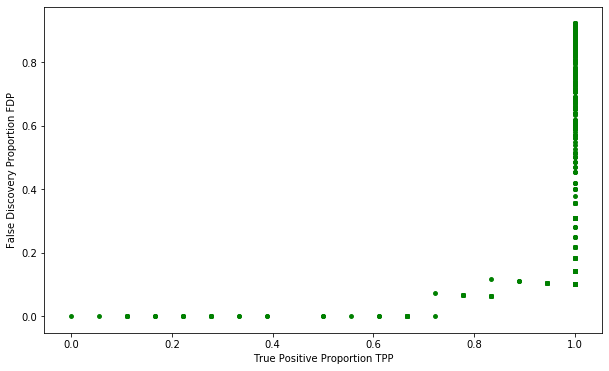

In [0]:
TTP,FDP=True_False(beta_hat,beta)
fig = plt.figure(figsize=(10, 6)) 
plt.scatter(TTP, FDP, s=15, color="green")
plt.xlabel("True Positive Proportion TPP")
plt.ylabel("False Discovery Proportion FDP")
plt.show()

 ### Corralation Variable

In [215]:
#generation d'une matrice symetrique
def make_sym_matrix(n,vals):
     m = np.zeros([n,n], dtype=np.double)
     xs,ys = np.triu_indices(n,k=1)
     m[xs,ys] = vals
     m[ys,xs] = vals
     m[ np.diag_indices(n) ] = 1
     return m

In [308]:
#generation de gaussian corrélées à partir de la matrice symetrique
def generate_correlated_gaussian(n, p, corr_mat, eta=0.001):
    # Compute the (upper) Cholesky decomposition matrix
    upper_chol = np.linalg.cholesky(corr_mat)
    
    # Generate 3 series of normally distributed (Gaussian) numbers
    #rnd = np.random.normal(0.0, 1.0, size=(10**7, 3))
    rnd1 = generate_gaussian(n, p) #Independant Gaussian designs

    rdn2=generate_gaussian(n, p)
    for i in range(rnd1.shape[0]):
      N=np.random.normal(size = n)
      eta=eta #Bruit Correlation
      rnd1+=eta*N
    # Finally, compute the inner product of upper_chol and rnd
    X1 = rnd1 @ upper_chol
    X2= rdn2 @ upper_chol
    return X1, X2

In [311]:
#Generation de beta true et beta simulés à partir de correlation et de bruit)
def expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False, eta=0.001):
    corr_mat=make_sym_matrix(n,corr)
    X_eta, X = generate_correlated_gaussian(n, p,corr_mat,eta=eta)
    X=Normalizer().fit_transform(X)
    X_eta=Normalizer().fit_transform(X_eta)
    y_eta, beta_eta = generate_true_y(X_eta, nb_no_zero, value_no_zero, sigma, noise=noise)
    _, beta_hat_eta, __ = linear_model.lasso_path(X_eta, y_eta, n_alphas=1000)

    y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=noise)
    _, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)
    return beta, beta_hat, beta_eta, beta_hat_eta

In [278]:
def plt_corr(beta_hat,beta,x=0,y=0):
    TTP,FDP=True_False(beta_hat,beta)
    fig = plt.figure(figsize=(10, 6)) 
    plt.scatter(TTP, FDP, s=15, color="green")
    plt.xlabel("True Positive Proportion TPP")
    plt.ylabel("False Discovery Proportion FDP")

    e=nb_no_zero/p #k/p
    delta=n/p #n/p

    trade_of_fill(epsilon=e,delta=delta,TTP=TTP,x=x,y=y)

In [397]:
# let's generate data and compute the Lasso path

n = 1000
p = 1000
nb_no_zero = 200
value_no_zero = 4
sigma = 0.1


In [312]:
corr=0.001
eta=0.001
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False, eta=eta)

TPP au premier faux positif :  0.11
FDP lorsque TPP = 50% :  0.09090909090909091
FDP lorsque TPP = 100% :  0.15254237288135594


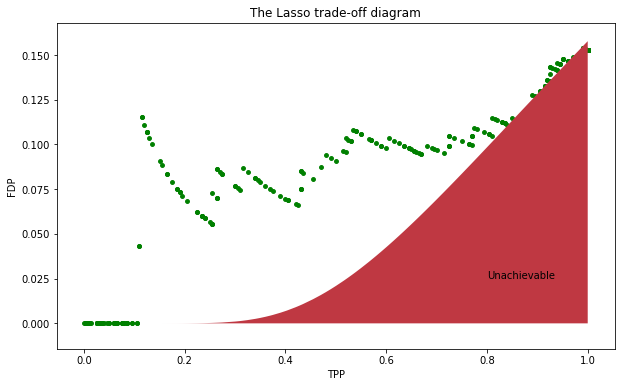

In [313]:
plt_corr(beta_hat,beta,x=0.8,y=0.025)

#### eta = 0.001

TPP au premier faux positif :  0.045
FDP lorsque TPP = 50% :  0.08256880733944955
FDP lorsque TPP = 100% :  0.11894273127753303


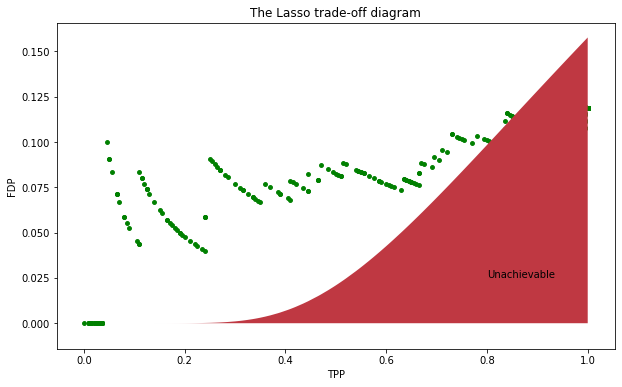

In [315]:
plt_corr(beta_hat_eta,beta_eta,x=0.8,y=0.025)

#### eta=0.01

In [328]:
corr=0.001
eta=0.01
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False, eta=eta)

TPP au premier faux positif :  0.28
FDP lorsque TPP = 50% :  0.05660377358490566
FDP lorsque TPP = 100% :  0.0867579908675799


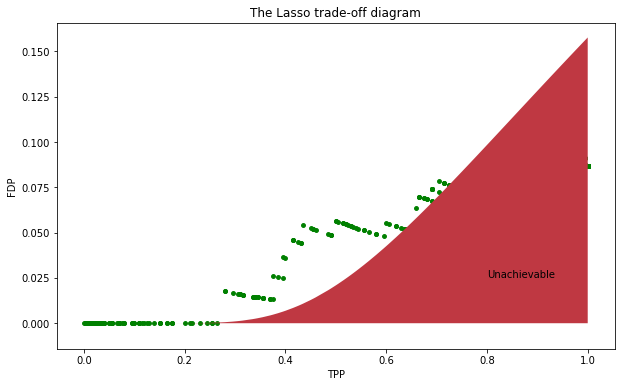

In [330]:
plt_corr(beta_hat_eta,beta_eta,x=0.8,y=0.025)

#### eta = 0.1

In [332]:
corr=0.001
eta=0.1
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False, eta=eta)

C:\Users\lmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4135896712661804, tolerance: 0.23092248730086917
  positive)
C:\Users\lmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3833894587851461, tolerance: 0.23092248730086917
  positive)
C:\Users\lmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33931664870374334, tolerance: 0.23092248730086917
  positive)
C:\Users\lmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

FDP lorsque TPP = 50% :  0.04672897196261682


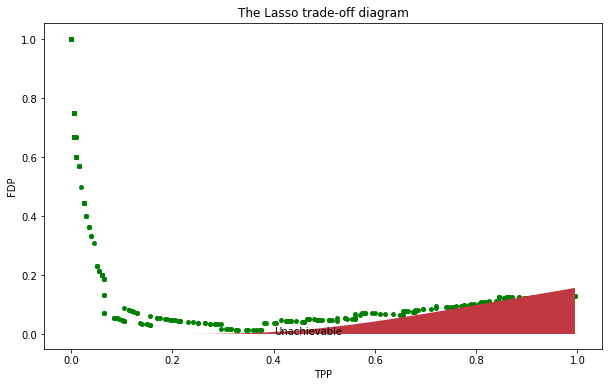

In [333]:
plt_corr(beta_hat_eta,beta_eta,x=0.4,y=0)

### Experience avec du bruit et eta

In [357]:
corr=0.001
eta=0.1
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=True, eta=eta)

TPP au premier faux positif :  0.105
FDP lorsque TPP = 50% :  0.056074766355140186
FDP lorsque TPP = 100% :  0.1031390134529148


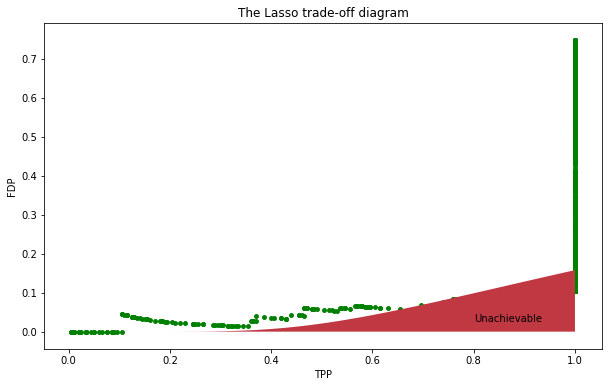

In [355]:
plt_corr(beta_hat,beta,x=0.8,y=0.025)

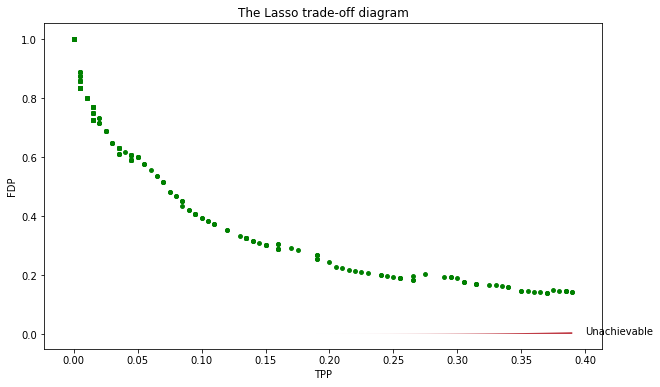

In [358]:
plt_corr(beta_hat_eta,beta_eta,x=0.4,y=0)

### Correlation = 0.1

In [401]:
corr=0.10
eta=0.001
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False,eta=eta)

FDP lorsque TPP = 50% :  0.0
TPP au premier faux positif :  0.605
FDP lorsque TPP = 100% :  0.024390243902439025


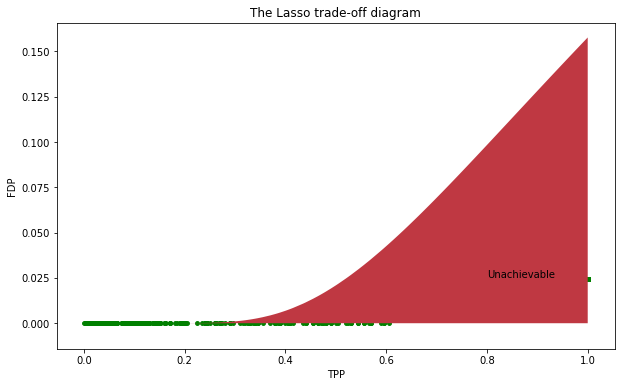

In [402]:
plt_corr(beta_hat,beta,x=0.8,y=0.025)

FDP lorsque TPP = 50% :  0.0
TPP au premier faux positif :  0.535
FDP lorsque TPP = 100% :  0.038461538461538464


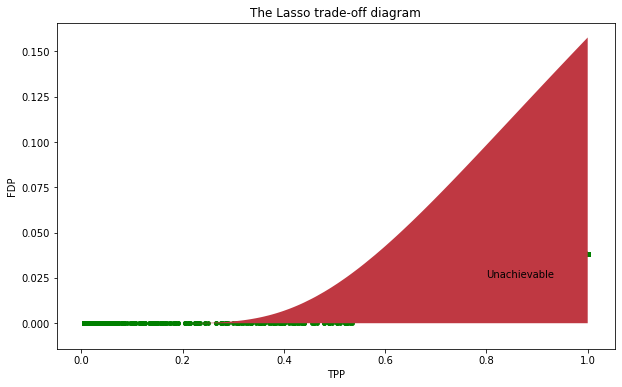

In [336]:
plt_corr(beta_hat_eta,beta_eta,x=0.8,y=0.025)

### Correlation = 0.3

In [341]:
corr=0.3
enet=0.1
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False)

TPP au premier faux positif :  0.22
FDP lorsque TPP = 50% :  0.04716981132075472


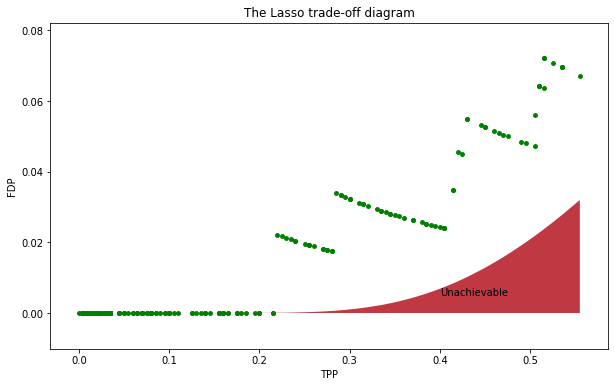

In [342]:
plt_corr(beta_hat,beta,x=0.4,y=0.005)

TPP au premier faux positif :  0.42
FDP lorsque TPP = 50% :  0.00980392156862745


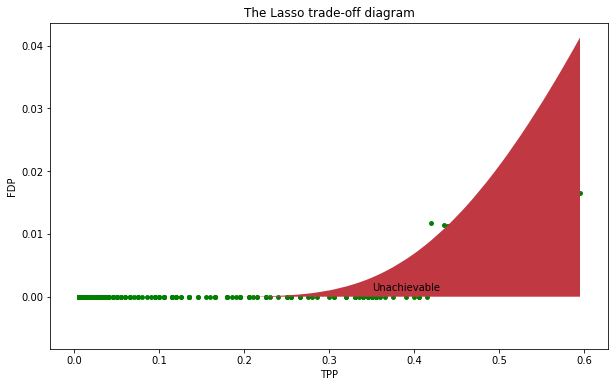

In [343]:
plt_corr(beta_hat_eta,beta_eta,x=0.35,y=0.001)

### Correlation = 0.5 et eta = 0.1

In [403]:
corr=0.5
eta=0.1
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False, eta=eta)

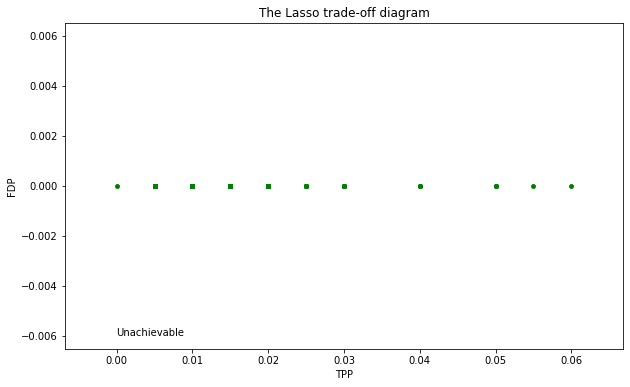

In [404]:
plt_corr(beta_hat,beta,x=0,y=-0.006)

TPP au premier faux positif :  0.005


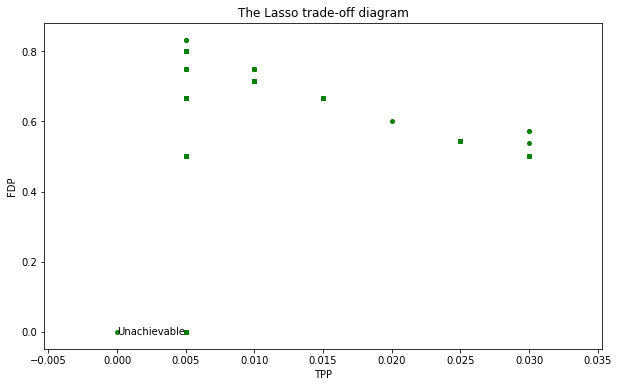

In [405]:
plt_corr(beta_hat_eta,beta_eta,x=0.0,y=-0.006)

### Correlation = 0.5 et Eta = 0.001

In [352]:
corr=0.5
enet=0.001
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False)

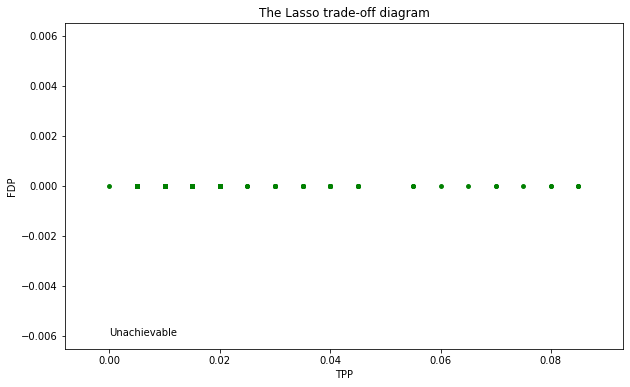

In [353]:
plt_corr(beta_hat_eta,beta_eta,x=0.0,y=-0.006)

### Correlation = 0.9

In [359]:
corr=0.9
enet=0.01
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=False)

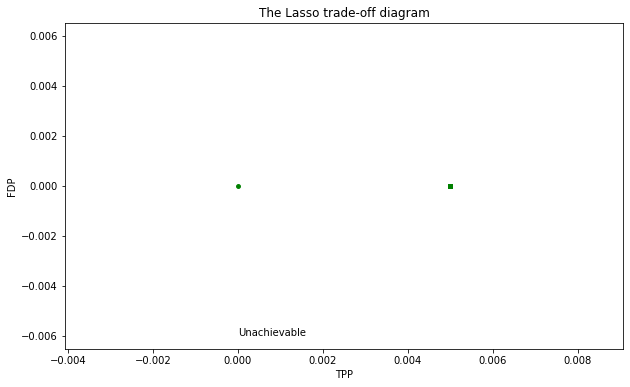

In [360]:
plt_corr(beta_hat,beta,x=0,y=-0.006)

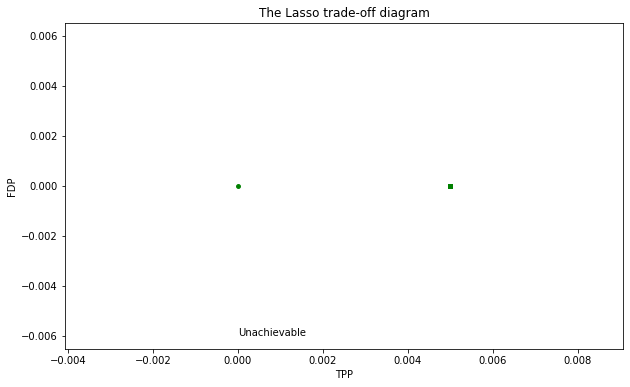

In [361]:
plt_corr(beta_hat_eta,beta_eta,x=0.0,y=-0.006)

In [362]:
corr=0.9
enet=0.01
beta, beta_hat, beta_eta, beta_hat_eta=expe_corr(n,p,nb_no_zero,value_no_zero,sigma, corr, noise=True)

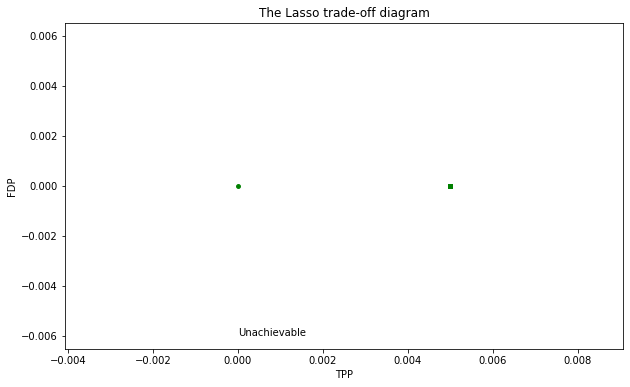

In [363]:
plt_corr(beta_hat,beta,x=0,y=-0.006)

### Generation de bruit avec le lasso path 

In [367]:
# let's generate data and compute the Lasso path

n = 1000
p = 1000
nb_no_zero = 200
value_no_zero = 4
sigma = 0.1

X = generate_gaussian(n, p)
y, beta = generate_true_y(X, nb_no_zero, value_no_zero, sigma, noise=True)
_, beta_hat, __ = linear_model.lasso_path(X, y, n_alphas=1000)
print(beta_hat.shape)


(1000, 1000)


TPP au premier faux positif :  0.31
FDP lorsque TPP = 50% :  0.06481481481481481
FDP lorsque TPP = 100% :  0.16317991631799164


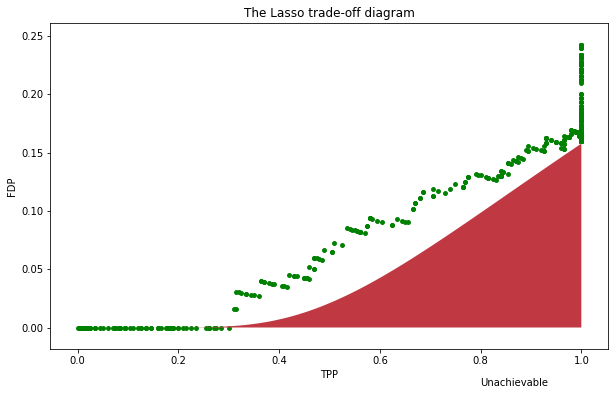

In [369]:
plt_corr(beta_hat,beta,x=0.8,y=-0.05)